In [2]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [5]:
# zip the file
from zipfile import ZipFile
data="/content/archive(5).zip"

with ZipFile(data,"r") as zip:
  zip.extractall()
  print("The datset is extracted")

The datset is extracted


In [8]:
df=pd.read_csv("/content/train.csv")

In [9]:
df.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [10]:
# shape of the data
df.shape

(1096, 5)

In [11]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


In [12]:
# tail of the data
df.tail()

,VWTI,SWTI,CWTI,EI,Class
1091,1.640600,3.5488,1.39640,-0.36424,0
1092,-0.048008,-1.6037,8.47560,0.75558,0
1093,2.942100,7.4101,-0.97709,-0.88406,0
1094,1.964700,6.9383,0.57722,0.66377,0
1095,-0.126240,10.3216,-3.71210,-6.11850,0


In [13]:
# describe
df.describe()

,VWTI,SWTI,CWTI,EI,Class
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.448500,1.780643,1.493533,-1.157454,0.445255
std,2.852623,5.922621,4.375655,2.084983,0.497221
min,-7.036400,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.790850,-2.125200,-1.574975,-2.246975,0.000000
50%,0.540430,2.205850,0.671900,-0.569190,0.000000
75%,2.835350,6.793925,3.574450,0.399980,1.000000
max,6.563300,12.730200,17.927400,2.449500,1.000000


In [14]:
X=df.drop(columns="Class")
Y=df["Class"]

In [15]:
print(X)
print(Y)

          VWTI     SWTI      CWTI        EI
0     2.263400  -4.4862   3.65580 -0.612510
1     3.271800   1.7837   2.11610  0.613340
2    -3.941100 -12.8792  13.05970 -3.312500
3     0.519500  -3.2633   3.08950 -0.984900
4     2.569800  -4.4076   5.98560  0.078002
...        ...      ...       ...       ...
1091  1.640600   3.5488   1.39640 -0.364240
1092 -0.048008  -1.6037   8.47560  0.755580
1093  2.942100   7.4101  -0.97709 -0.884060
1094  1.964700   6.9383   0.57722  0.663770
1095 -0.126240  10.3216  -3.71210 -6.118500

[1096 rows x 4 columns]
0       0
1       0
2       1
3       0
4       0
       ..
1091    0
1092    0
1093    0
1094    0
1095    0
Name: Class, Length: 1096, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [19]:
print(x_train.shape,x_test.shape)

(876, 4) (220, 4)


In [20]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [21]:
x_train_scaled[0]

array([ 1.12597468, -0.94856277,  0.61265842,  1.10887721])

**Build Neural Network**

In [41]:
from tensorflow.keras.layers import Dense,Dropout
num_of_classes=1
model=Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32,activation="relu"),
    Dropout(0.5),
    Dense(num_of_classes,activation="sigmoid")


]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# compile the model
model.compile(optimizer='Adam',loss="binary_crossentropy",metrics=["accuracy"])

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [48]:
# Train the model
history = model.fit(
    x_train_scaled, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping]  # Use early stopping callback
)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8047 - loss: 0.5350 - val_accuracy: 0.9318 - val_loss: 0.4241
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8885 - loss: 0.4285 - val_accuracy: 0.9318 - val_loss: 0.3183
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8856 - loss: 0.3521 - val_accuracy: 0.9375 - val_loss: 0.2204
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9101 - loss: 0.2630 - val_accuracy: 0.9716 - val_loss: 0.1458
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9292 - loss: 0.2126 - val_accuracy: 0.9886 - val_loss: 0.0958
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9461 - loss: 0.1589 - val_accuracy: 0.9943 - val_loss: 0.0654
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.1131 - val_accuracy: 0.9943 - val_loss: 0.0467
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9677 - loss: 0.1047 - val_accuracy: 0.9943 - val_loss:

In [36]:
y_train.shape

(876,)

In [37]:
y_test.shape

(220,)

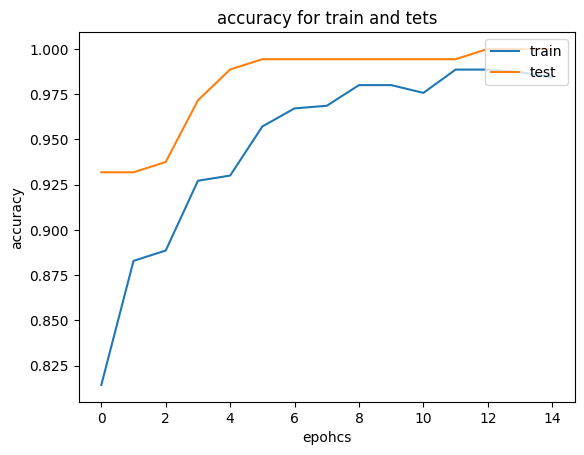

In [50]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("accuracy for train and tets")
plt.xlabel("epohcs")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="upper right")
plt.show()

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

prediction=model.predict(x_test>0.5).astype(int)
classification=classification_report(y_test,prediction)
print(classification)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       124
           1       0.00      0.00      0.00        96

    accuracy                           0.56       220
   macro avg       0.28      0.50      0.36       220
weighted avg       0.32      0.56      0.41       220



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


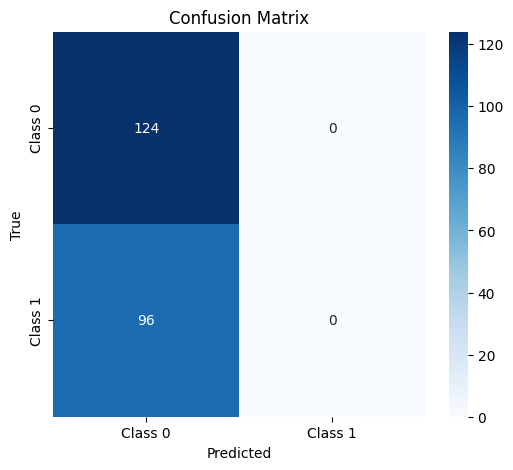

In [56]:
# Plot confusion matrix using seaborn heatmap
import seaborn as sns
# Confusion matrix
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Predictive System**

In [57]:
def input_data(input):
  scaled_data=scaler.transform(input)
  prediction=model.predict(scaled_data)
  predict_classes=(prediction>0.5).astype(int)
  if predict_classes[0]==1:
    return "Real Note"
  else:
    return "Fake Note"


In [58]:
input = np.array([[1.5, 2.3, 3.4, 0.7]])
result=input_data(input)
print(result)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
Fake Note


In [59]:
input = np.array([[-3.9411, -12.8792,  13.0597,  -3.3125]])
result=input_data(input)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Real Note


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [60]:
import pickle

model.save('models/model.h5')
# Save the scaler using pickle
with open('models/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
